<a href="https://colab.research.google.com/github/Prisci723/InteligenciaArtificial1/blob/main/Redes%20Neuronales/Laboratorio_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJEMPLO - RED NEURONAL PARA EL RATING DE PLAYSTORE

Este ejemplo considera los siguientes objetivos:
- Limpieza de datos con pandas
- Cargar datos desde el CSV, con el dataset ya limpio para usar con Keras.
- Definir y compilar un modelo de Perceptron multicapa en Keras.
- Evaluar un modelo Keras en un conjunto de datos de validación.

Los pasos para poder crear este modelo, son los siguientes:
1. Cargar datos.
2. Limpiar los datos
3. Cargar el dataset ya limpio.
4. Definir el Modelo.
5. Compilar el Modelo.
6. Entrenar el Modelo.
7. Evaluar el Modelo.

### Dataset
El siguiente dataset contiene información sobre aplicaciones de Play Store, información detallada de cada aplicación y lo que se busca predecir es el rating de la app.

### Limpieza de los datos
Es necesario aplicar limpieza a los datos debido a que el dataset presenta varias inconsistencias y muchos valores nulos.



In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [16]:
import pandas as pd

In [ ]:
dataframe = pd.read_csv("/content/gdrive/MyDrive/googleplaystore.csv", sep=",")
print(dataframe)

Se eliminand las columnas App, por no poder ser procesada, Current ver por tener demasiados valores nulos, y unnamed: 13 por que no posee una descripción, está llena de valores nulos y no aporta al desarrollo del modelo

In [ ]:
dataframe.drop('App', axis=1, inplace=True)
dataframe.drop('Current Ver', axis=1, inplace=True)
dataframe.drop('Unnamed: 13', axis=1, inplace=True)

### Tratamiento para numeros que poseen letras

In [ ]:
import re
dataframe = dataframe[dataframe['Installs'] != 'Free']
dataframe['Installs'] = dataframe['Installs'].apply(lambda x: int(re.sub('[^\d]+', '', x)) if x else 0)

In [ ]:
def convert_size_to_mb(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convertir de kilobytes a megabytes
    else:
        return None  # Manejar el caso si el tamaño no tiene una unidad válida

dataframe['Size'] = dataframe['Size'].apply(convert_size_to_mb)

In [ ]:
def convert_price_to_integer(price):
    if price == '$0':
        return 0
    else:
        return int(price.replace('$', '').replace('.', ''))

dataframe['Price'] = dataframe['Price'].apply(convert_price_to_integer)

Se convierte la fecha a unix time

In [ ]:
dataframe['Last Updated'] = pd.to_datetime(dataframe['Last Updated'], errors='coerce')
dataframe['Last Updated'].fillna(0, inplace=True)
dataframe['Last Updated'] = dataframe['Last Updated'].apply(lambda x: x.timestamp() if x != 0 else 0)

In [ ]:
# columnas_numericas = dataframe.columns[:]

# Verificar si hay valores no numéricos en las columnas excepto la fecha[columnas_numericas]
non_numeric_columns = dataframe.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()
print("Valores no numéricos en las columnas:")
print(non_numeric_columns)

Verificación si aún existen valores no numéricos dentro del dataset

In [ ]:
# columnas_numericas = dataframe.columns[:]

# Verificar si hay valores no numéricos en las columnas excepto la fecha[columnas_numericas]
non_numeric_columns = dataframe.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()
print("Valores no numéricos en las columnas:")
print(non_numeric_columns)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

Algunas de las columnas cambian sus categorias por numeros que representarán su categoría en orden

In [ ]:
dataframe['Category'] = enc.fit_transform(dataframe[['Category']])
dataframe['Type'] = enc.fit_transform(dataframe[['Type']])
dataframe['Content Rating'] = enc.fit_transform(dataframe[['Content Rating']])
dataframe['Genres'] = enc.fit_transform(dataframe[['Genres']])
dataframe['Android Ver'] = enc.fit_transform(dataframe[['Android Ver']])

Tratamiento de los datos nulos

In [ ]:
print(dataframe.isnull().any())

Los valores nulos son rellenos con su media

In [ ]:
mean_gs = dataframe["Type"].mean()
dataframe["Type"] = dataframe["Type"].fillna(mean_gs)
mean_sr = dataframe["Size"].mean()
dataframe["Size"] = dataframe["Size"].fillna(mean_sr)
mean_ss = dataframe["Rating"].mean()
dataframe["Rating"] = dataframe["Rating"].fillna(mean_ss)
mean_av = dataframe['Android Ver'].mean()
dataframe['Android Ver'] = dataframe['Android Ver'].fillna(mean_av)

Podemos verificar los tipos de datos existentes dentro de cada columna

In [ ]:
print(dataframe['Rating'].unique())

Los datos son guardados y exportados como un .csv

In [ ]:
dataframe.to_csv('GooglePlayStoreRatingCLEANver5.csv', index=False)

## Cargar datos
### Descripción de los datos

1. Reviews: Cantidad de reviews que contiene la app, hecha por los usuarios.
2. Tamaño de la app: tamaño de la app en MB
3. Cantidad de instalaciones
4. Tipo; si es de pago o si es gratis
5. Precio de la app
6. Tipo de clasificación del contenido por edad
7. Género de la app, aparte de su categoría principal
8. Última vez que fue actualiza en unix time
9. Versión de android
10. Categoría principal a la que pertenece la app



### Cargar dataset
El dataset es cargado utilizando numpy y el modelo será utilizado con geras.

In [17]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
from keras.utils import plot_model

seed = 7
numpy.random.seed(seed)

# Cargar el dataset de los indios Pima.
dataset = numpy.loadtxt('/content/gdrive/MyDrive/GooglePlayStoreRatingCLEANver5.csv', delimiter=",")

# Dividir los datos en features y label.
X = dataset[:, 1:]
Y = dataset[:, 0]

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Para poder definir el modelo y evaluar el comportamiento de los datos:

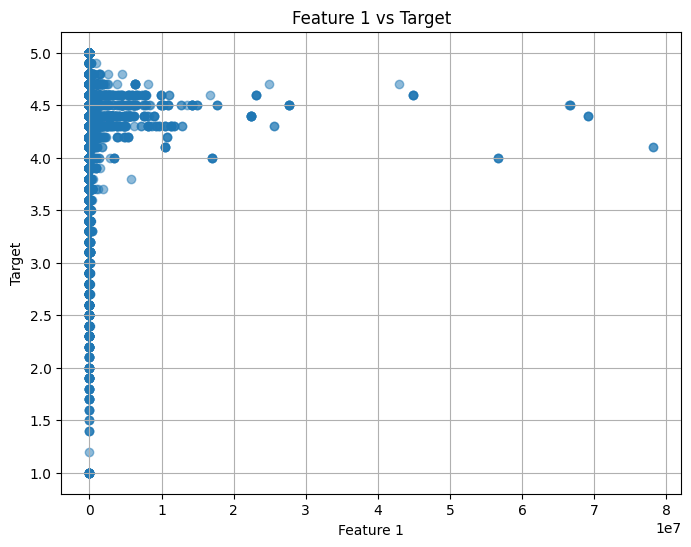

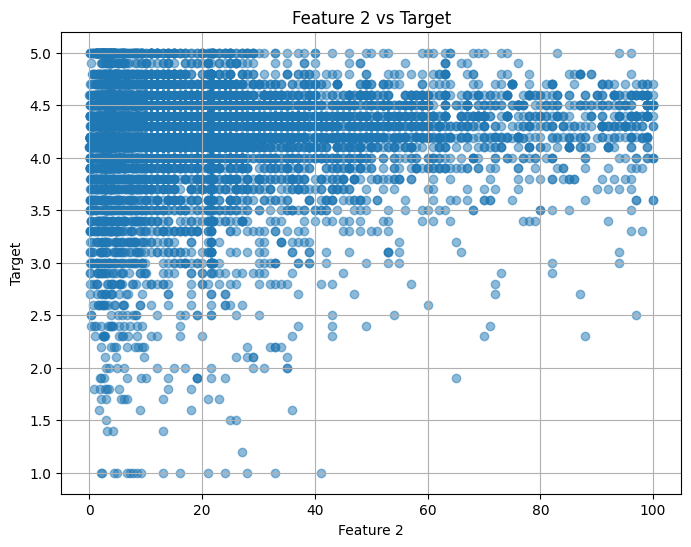

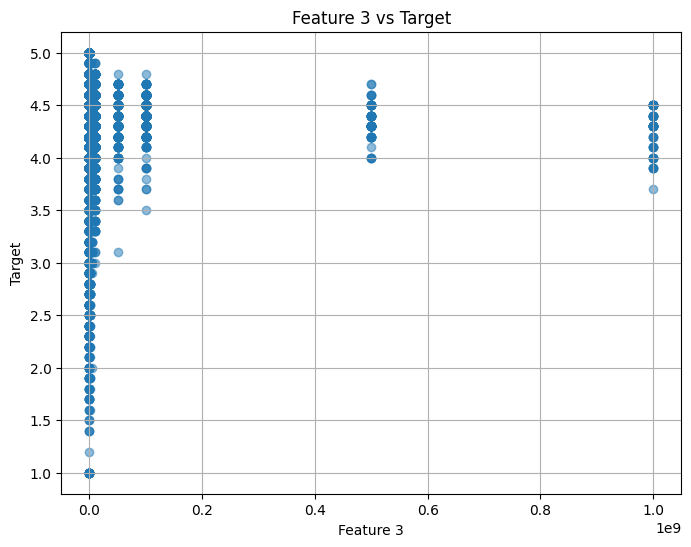

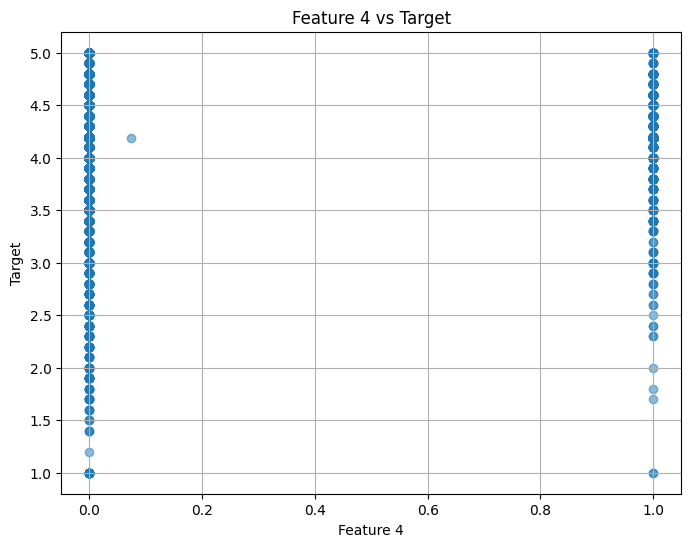

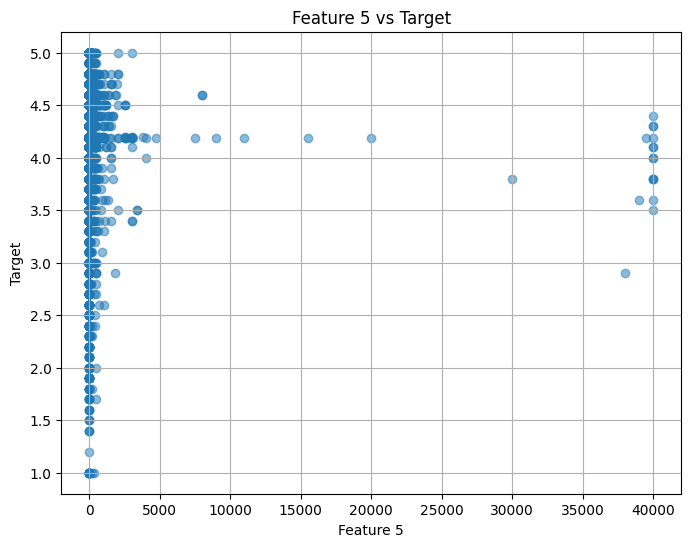

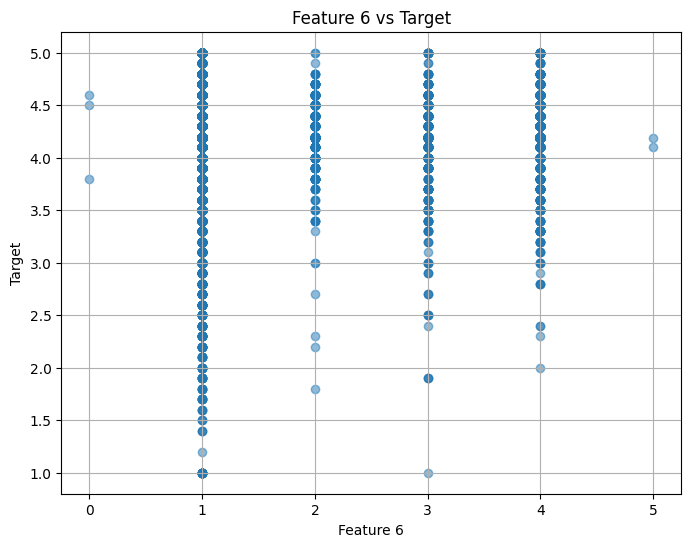

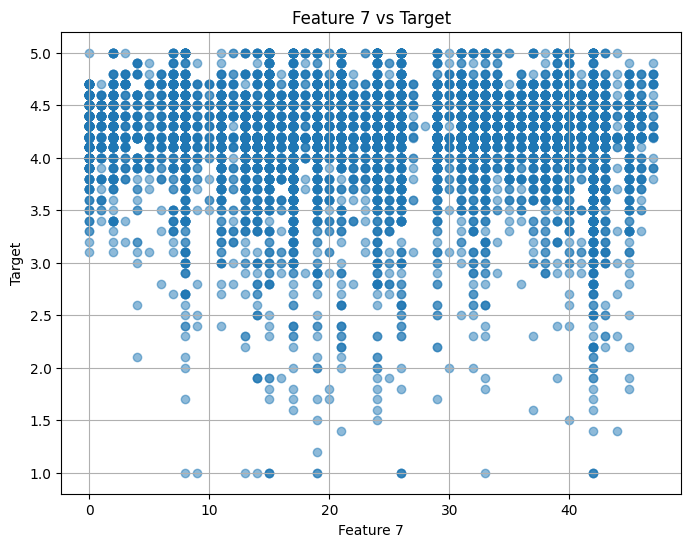

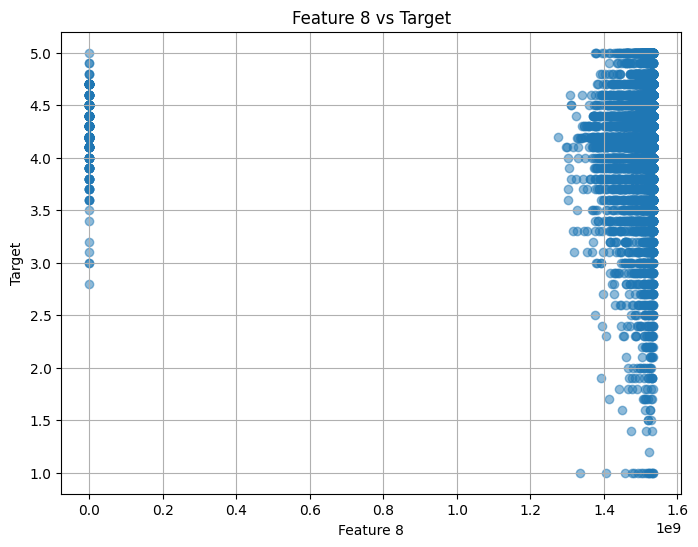

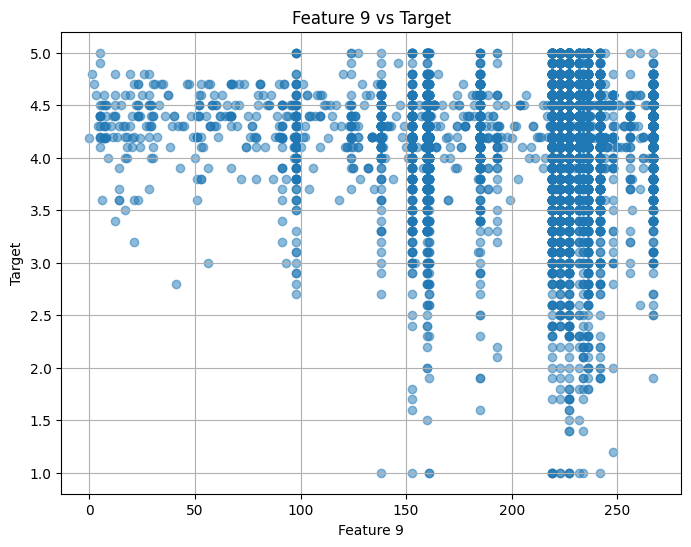

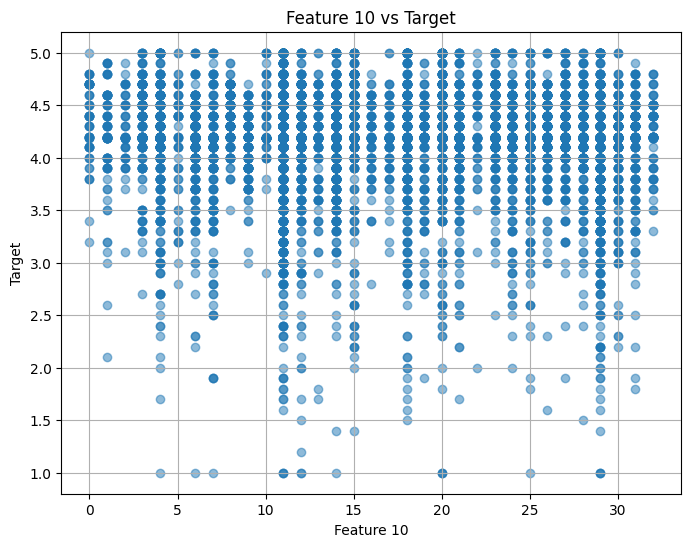

In [19]:
# Obtén el número de características (número de columnas en X)
num_features = X.shape[1]

# Itera sobre cada característica y crea un gráfico para visualizar su relación con el target
for i in range(num_features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, i], Y, alpha=0.5)
    plt.title(f'Feature {i+1} vs Target')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.grid(True)
    plt.show()

El dataset es convertido a polinómico cuadrático, debido al comportamiento de los datos

In [4]:
X = np.concatenate([X, X * X], axis=1)

Los datos son normalizados debido a que se encuentran en distintas escalas y son muy grandes, además de que ayuda a que la función de costo converja más rápido

In [5]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [6]:
X, mu, sigma = featureNormalize(X)

In [7]:
print(dataset)

[[4.10000000e+00 1.59000000e+02 1.90000000e+01 ... 1.51528320e+09
  2.23000000e+02 0.00000000e+00]
 [3.90000000e+00 9.67000000e+02 1.40000000e+01 ... 0.00000000e+00
  1.25000000e+02 0.00000000e+00]
 [4.70000000e+00 8.75100000e+04 8.70000000e+00 ... 1.53308160e+09
  2.23000000e+02 0.00000000e+00]
 ...
 [4.19175742e+00 3.00000000e+00 9.50000000e+00 ... 1.48487040e+09
  1.53000000e+02 2.00000000e+01]
 [4.50000000e+00 1.14000000e+02 2.15161654e+01 ... 1.42162560e+09
  2.67000000e+02 3.00000000e+00]
 [4.50000000e+00 3.98307000e+05 1.90000000e+01 ... 1.53247680e+09
  2.67000000e+02 1.80000000e+01]]


In [8]:
print(X)
print(Y)

[[-1.51656654e-01 -1.21279416e-01 -1.81761353e-01 ...  1.83754222e-01
   6.20251117e-02 -1.18342285e+00]
 [-1.51380662e-01 -3.62279897e-01 -1.75998372e-01 ... -6.04771450e+00
  -2.17509584e+00 -1.18342285e+00]
 [-1.21819847e-01 -6.17740408e-01 -1.23073035e-01 ...  3.31002662e-01
   6.20251117e-02 -1.18342285e+00]
 ...
 [-1.51709939e-01 -5.79180331e-01 -1.81867204e-01 ... -6.38754601e-02
  -1.66448859e+00  1.70959184e-01]
 [-1.51672025e-01 -2.29463129e-14 -1.81867204e-01 ... -5.62756911e-01
   1.47629697e+00 -1.15294926e+00]
 [-1.56597540e-02 -1.21279416e-01 -6.42671056e-02 ...  3.25970853e-01
   1.47629697e+00 -8.63734028e-02]]
[4.1        3.9        4.7        ... 4.19175742 4.5        4.5       ]


### Definir el modelo
Debido al comportamiento de los datos es que se utiliza la función multavariable que como función de costo utiliza el MSE.

In [12]:
model = Sequential()

# Capa de entrada con el número de neuronas igual al número de características de entrada
model.add(Dense(12, input_dim=20, activation='relu'))

# Capa oculta
model.add(Dense(10, activation='relu'))

# Capa de salida con activación 'linear' para regresión
model.add(Dense(1, activation='linear'))  # Una neurona para regresión lineal
model.summary()

### Compilar el modelo
Se utiliza en MSE para el modelo

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

### Entrenar el modelo
Los epochs son definidos como 500 debido a que la función de costo no varía en las siguientes iteraciones.

In [14]:
model.fit(X, Y, epochs=500, batch_size=256)

#model.fit(X, Y, epochs=50, batch_size=250, verbose=2, validation_split=0.2)

Epoch 1/500
43/43 [==============================] - 1s 2ms/step - loss: 14.0132 - mean_absolute_error: 3.6648
Epoch 2/500
43/43 [==============================] - 0s 2ms/step - loss: 7.3860 - mean_absolute_error: 2.5223
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 3.5306 - mean_absolute_error: 1.5975
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 1.8762 - mean_absolute_error: 1.1186
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2214 - mean_absolute_error: 0.8763
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 0.9986 - mean_absolute_error: 0.7827
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 0.8738 - mean_absolute_error: 0.7273
Epoch 8/500
43/43 [==============================] - 0s 2ms/step - loss: 0.7758 - mean_absolute_error: 0.6815
Epoch 9/500
43/43 [==============================] - 0s 2ms/step - loss: 0.6958 - mean_absolute_error: 0.6418
Epoch 10/

# Evalúar el modelo
La evaluación devuelve un valor bastante bajo de entrenamiento, muy probablemente se debe a los problemas con el dataset y la calidad de datos que contenía.

In [15]:
scores = model.evaluate(X, Y)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

339/339 [==============================] - 1s 1ms/step - loss: 0.2109 - mean_absolute_error: 0.3076
mean_absolute_error: 30.76%
